In [17]:
import os
import numpy as np
import networkx as nx
import matching.glema.common.utils as utils
import matching.misc.cpg_const as cpg_const

In [18]:
args = utils.parse_args( use_default=True )
args.dataset = "CPG"
args.directed = True
args.iso = True

dataset = f"{args.dataset}_test"

In [50]:
record_scopes = { }
record_scope_filepath = os.path.join( args.raw_dataset_dir, args.dataset, args.dataset + ".record_scopes" )
record_scope_filepath = utils.get_abs_file_path( record_scope_filepath )
record_scope_file = open( record_scope_filepath, "r" )
for idx, record_scope in enumerate( record_scope_file.read().strip().split( "\n" ) ):
    record_scopes[ str( idx ) ] = record_scope

In [60]:
def map_node_label_idx( node_id, idx, node_id_mapping ):
    record_type = utils.get_enum_by_idx( cpg_const.NodeLabel, idx )
    label = record_type.value

    if record_type == cpg_const.NodeLabel.RECORD:
        nid = node_id
        if node_id_mapping is not None:
            for source_id, query_id in node_id_mapping.items():
                if query_id == node_id:
                    nid = source_id
        label = record_scopes[ str( nid ) ]

    return label


def get_node_labels( G, node_id_mapping=None ):
    labels = nx.get_node_attributes( G, 'label' )
    return { key: map_node_label_idx( key, value, node_id_mapping ) for key, value in labels.items() }


In [70]:
source_graph_idx = 2
query_subgraph_idx = 0

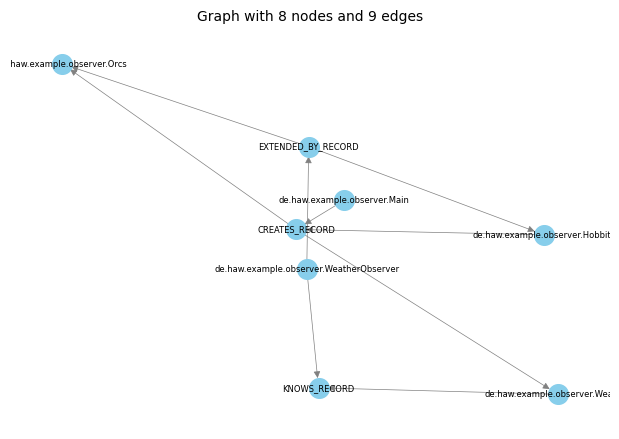

In [71]:
graphs = utils.read_graphs( f"{args.dataset_dir}/{dataset}/{source_graph_idx}/source.lg", directed=args.directed )
graph = graphs[ source_graph_idx ]

utils.plot_graph( graph, nodeLabels=get_node_labels( graph ) )

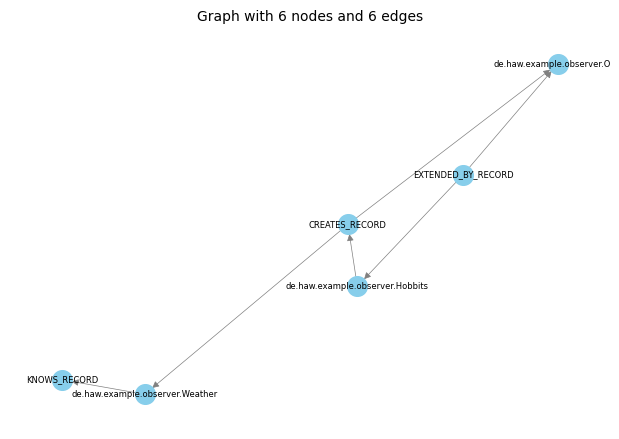

In [72]:
query_node_mapping = utils.read_mapping(
    f"{args.dataset_dir}/{dataset}/{source_graph_idx}/{'non' if not args.iso else ''}iso_subgraphs_mapping.lg"
)
mapping_gt = query_node_mapping[ query_subgraph_idx ]

queries = utils.read_graphs(
    f"{args.dataset_dir}/{dataset}/{source_graph_idx}/{'non' if not args.iso else ''}iso_subgraphs.lg",
    directed=args.directed
)
query = queries[ query_subgraph_idx ]

utils.plot_graph( query, nodeLabels=get_node_labels( query, node_id_mapping=mapping_gt ) )